In [67]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [68]:
df = pd.read_csv("data/data.csv")

In [69]:

print(df['Bankrupt'].value_counts())

Bankrupt
0    6599
1     220
Name: count, dtype: int64


In [70]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Bankrupt'] == 0]
minority_class = df[df['Bankrupt'] == 1]

# Undersample the majority class to match the size of the minority class
majority_undersampled = resample(majority_class, 
                                 replace=False,    # Sample without replacement
                                 n_samples=len(minority_class),  # Match minority class size
                                 random_state=42)  # For reproducibility

# Combine undersampled majority class with the minority class
df_balanced = pd.concat([majority_undersampled, minority_class])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Bankrupt'].value_counts())  # Check class balance

df = df_balanced


Bankrupt
1    220
0    220
Name: count, dtype: int64


In [71]:
dataset_knn = df.copy()
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.390825,0.489806,0.435676,0.596340,0.596340,0.998950,0.796742,0.808702,0.302432,...,0.761755,0.065664,0.624227,0.596339,0.836744,0.281959,0.026451,0.562771,1,0.023534
1,0,0.505826,0.573757,0.550137,0.607439,0.607439,0.999043,0.797500,0.809395,0.303561,...,0.821932,0.000479,0.624137,0.607436,0.841976,0.278803,0.026791,0.565158,1,0.033716
2,1,0.494418,0.567815,0.549976,0.611439,0.611439,0.999171,0.797623,0.809537,0.303511,...,0.813856,0.013818,0.619851,0.611440,0.843782,0.298168,0.026827,0.565324,1,0.014353
3,1,0.491396,0.535325,0.533487,0.607223,0.607115,0.999031,0.797368,0.809277,0.303356,...,0.792092,0.004867,0.623020,0.607219,0.839630,0.283400,0.020760,0.571268,1,0.021335
4,1,0.491201,0.542085,0.549601,0.590827,0.590827,0.998744,0.797391,0.809336,0.303997,...,0.799124,0.006410,0.587512,0.590822,0.840333,0.281329,0.031192,0.569222,1,0.024794


<Axes: >

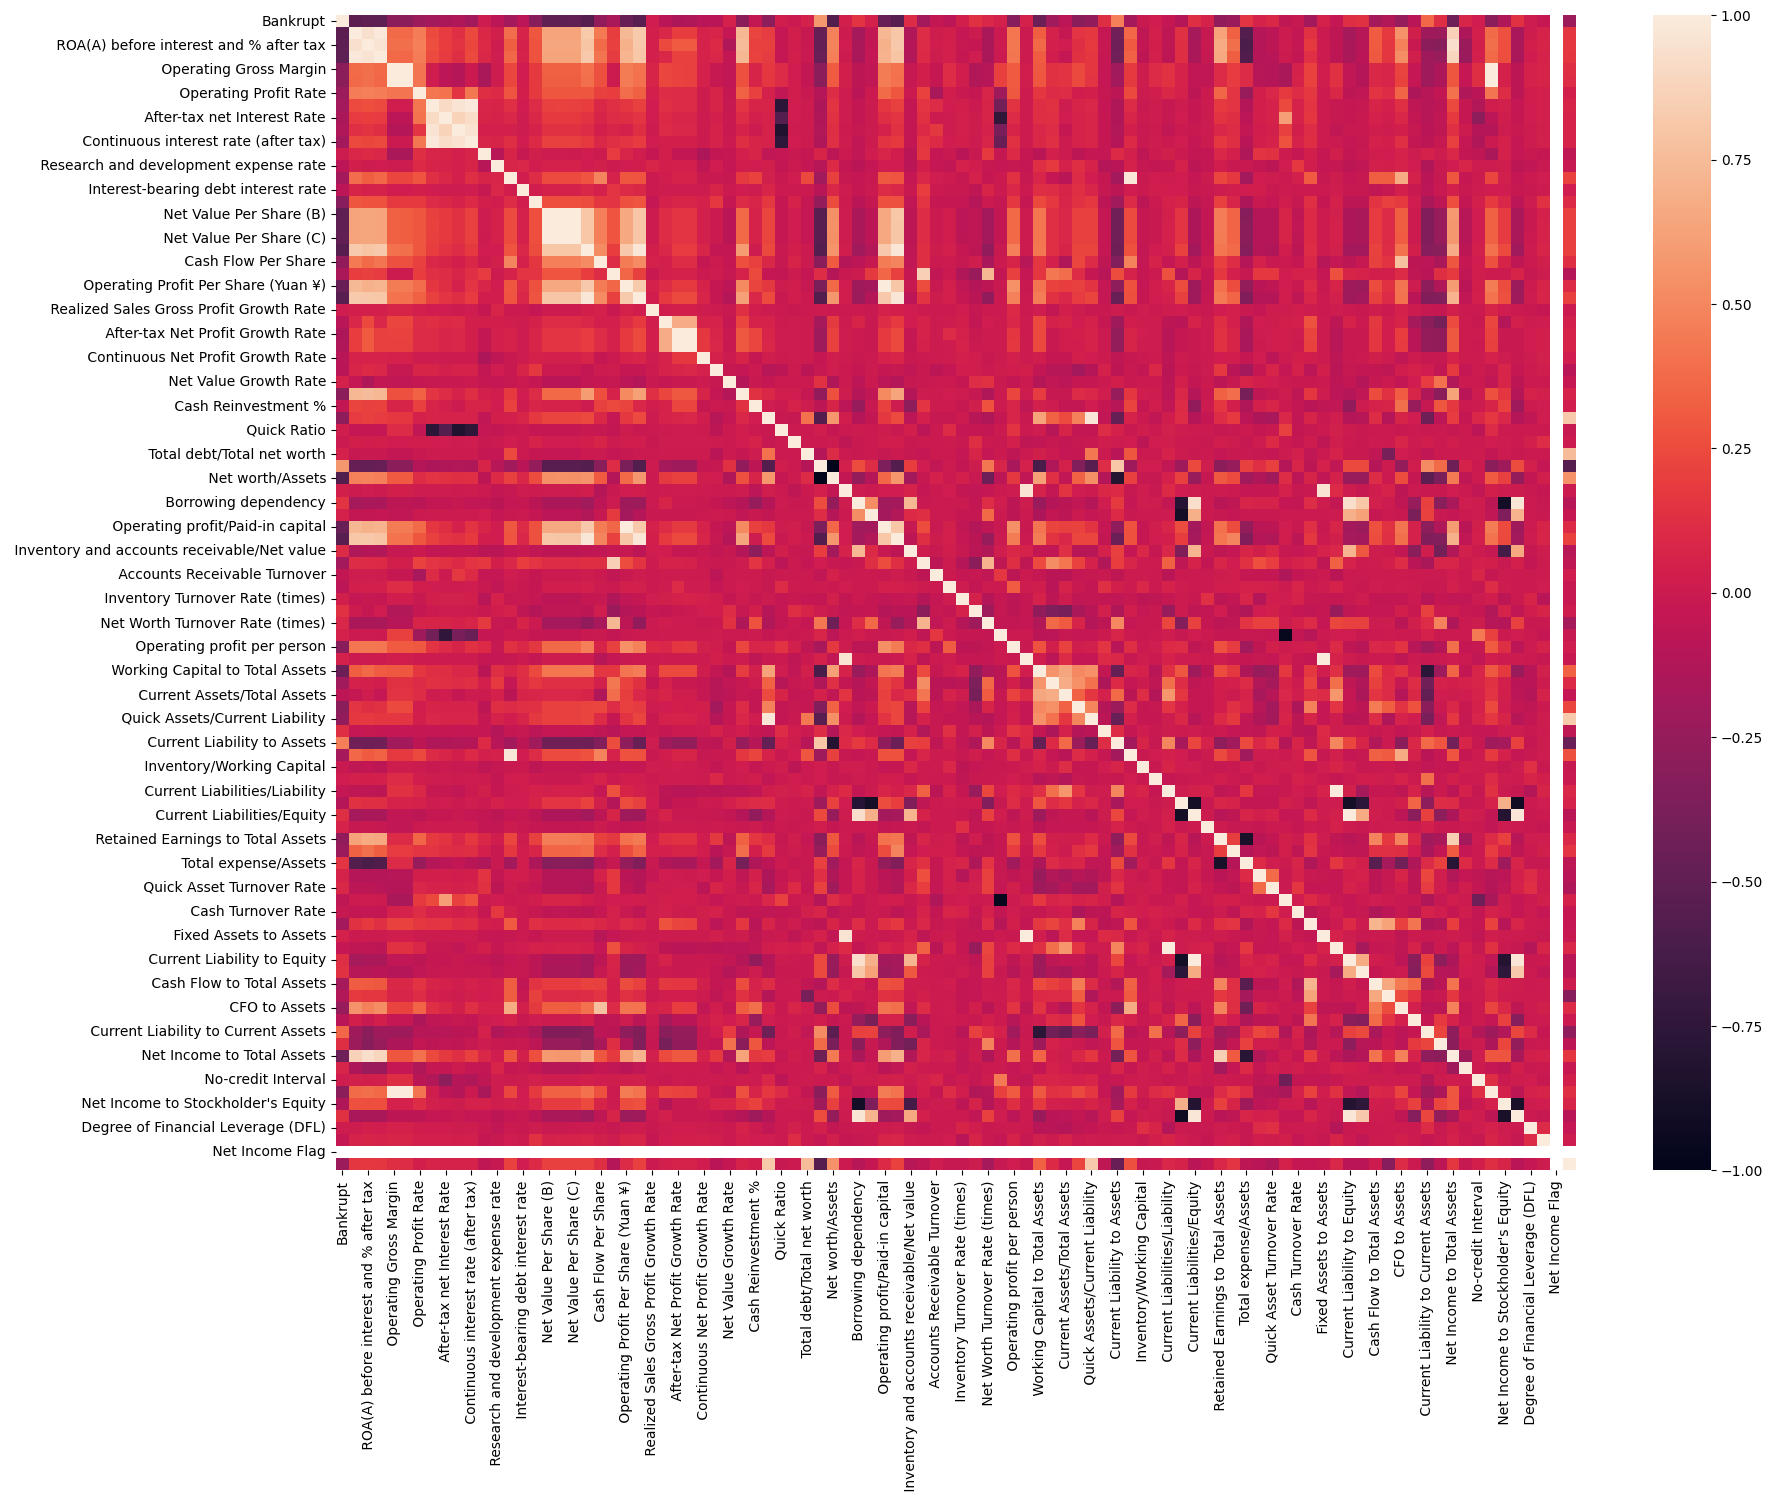

In [72]:
plt.subplots(figsize=(20,15))
sn.heatmap(df.corr())

<Axes: >

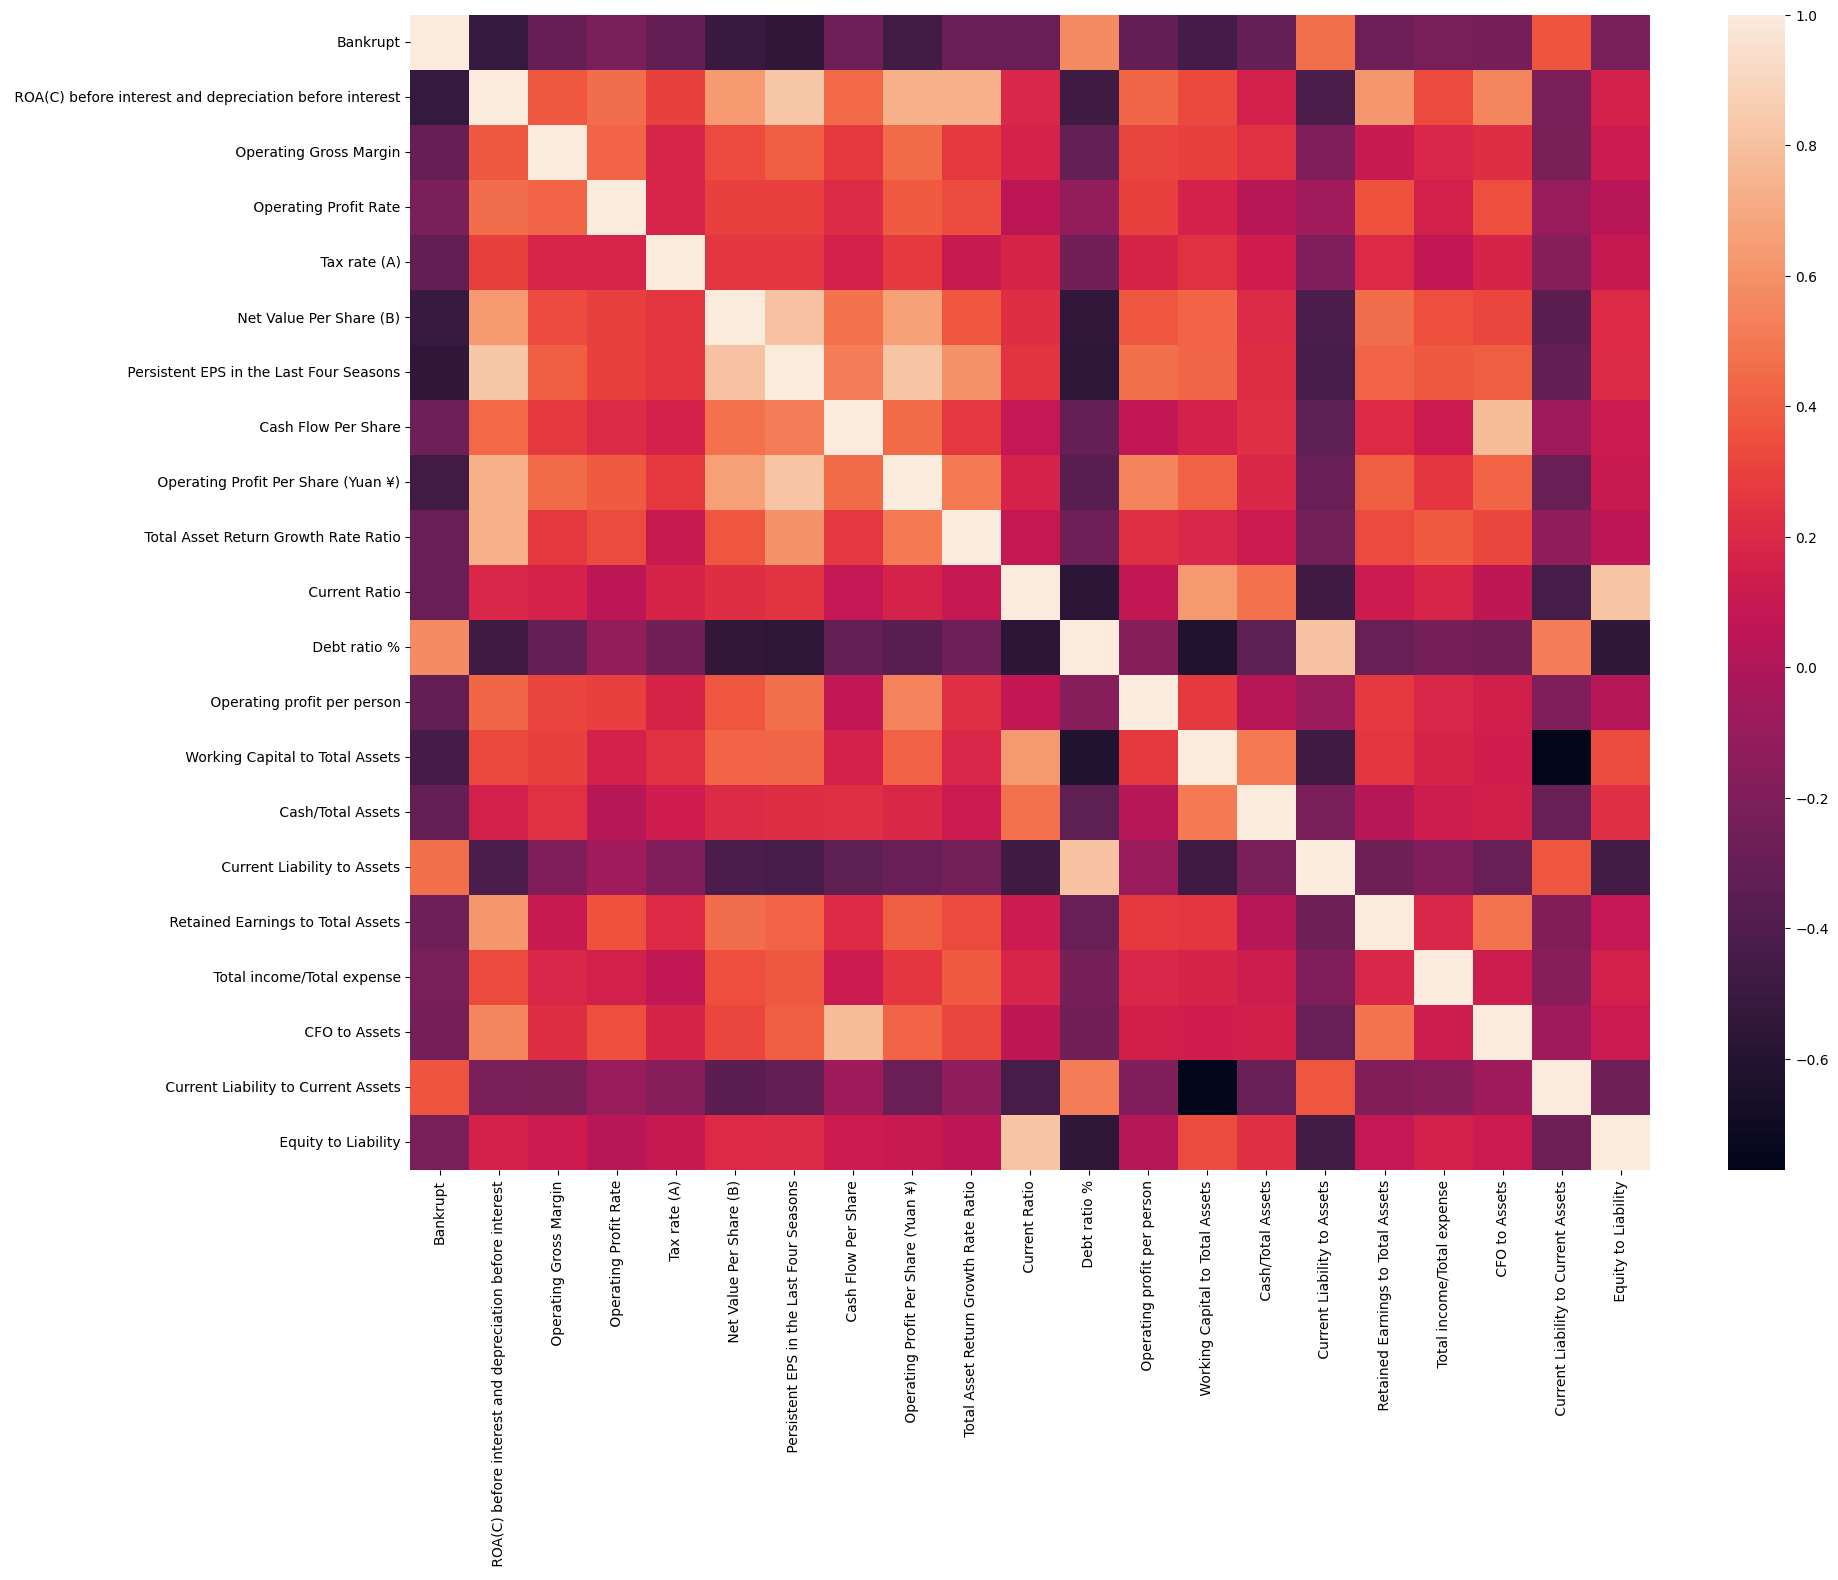

In [73]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Step 1: Identify columns where correlation with 'Bankrupt' is >= 0.25
columns_to_keep = correlation_matrix['Bankrupt'][abs(correlation_matrix['Bankrupt']) >= 0.20].index

# Step 2: Filter the dataset for the selected columns
df = df[columns_to_keep]

# Step 3: Remove highly correlated columns (correlation > 0.9)
correlation_matrix_filtered = df.corr()
columns_to_drop = set()

# Iterate through the correlation matrix to identify highly correlated columns
for i in range(len(correlation_matrix_filtered.columns)):
    for j in range(i + 1, len(correlation_matrix_filtered.columns)):
        if abs(correlation_matrix_filtered.iloc[i, j]) > 0.9:  # Threshold for high correlation
            col_to_drop = correlation_matrix_filtered.columns[j]
            columns_to_drop.add(col_to_drop)

# Drop the highly correlated columns
df = df.drop(columns=columns_to_drop)
plt.subplots(figsize=(20,15))
sn.heatmap(df.corr())

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Separate features and target
predictors = df.drop('Bankrupt', axis=1)  # Replace 'target_column' with the actual target column name
target = df['Bankrupt']  # Replace with your actual target column

# Standardize the features
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
pca = PCA(n_components=6)
predictors_pca = pca.fit_transform(predictors_scaled)
import pandas as pd

# Convert PCA features back to a DataFrame
predictors_pca_df = pd.DataFrame(predictors_pca, columns=[f'PC{i+1}' for i in range(6)])

# Add the target variable
reduced_df = pd.concat([predictors_pca_df, target.reset_index(drop=True)], axis=1)

#reduced_df = reduced_df[:1000]

df = reduced_df.copy()


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       440 non-null    float64
 1   PC2       440 non-null    float64
 2   PC3       440 non-null    float64
 3   PC4       440 non-null    float64
 4   PC5       440 non-null    float64
 5   PC6       440 non-null    float64
 6   Bankrupt  440 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 24.2 KB


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [77]:
df_Predictors=df.drop(["Bankrupt"],axis=1)
df_target=df.Bankrupt
features = df_Predictors

In [78]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df_Predictors,df_target,random_state=10,test_size=0.2)
print("Shape of Xtrain:{} and Shape of ytrain:{} ".format(Xtrain.shape,ytrain.shape))
print("Shape of Xtest:{} and Shape of ytest:{} ".format(Xtest.shape,ytest.shape))

Shape of Xtrain:(352, 6) and Shape of ytrain:(352,) 
Shape of Xtest:(88, 6) and Shape of ytest:(88,) 


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from scipy import stats


import time
import math 
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import time

# Define classifier with class weights
classifiers = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    #"LGBM" : LGBMClassifier(random_state=42)
}

# Define grid
KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

LR_grid = {'penalty': ['l1', 'l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200],
           'max_depth': [4, 6, 8, 10, 12]}

LGBM_grid = {'n_estimators': [50, 100, 150],
             'max_depth': [4, 6, 8, 10, 12],
             'learning_rate': [0.05, 0.1, 0.15]}

grid = {
    "KNN": KNN_grid,
    "LogisticRegression": LR_grid,
    "RandomForest": RF_grid,
    "LGBM": LGBM_grid
}

# Initialize data structures
i = 0
clf_best_params = classifiers.copy()
scores = pd.DataFrame({
    'Classifier': classifiers.keys(),
    'Train F1 Score': np.zeros(len(classifiers)),
    'Validation F1 Score': np.zeros(len(classifiers)),
    'Training time (mins)': np.zeros(len(classifiers))
})

# Training loop with GridSearchCV
for key, classifier in classifiers.items():
    start = time.time()
    
    # Apply SMOTE for oversampling the minority class
    smote = SMOTE(sampling_strategy='minority')
    X_train_res, y_train_res = smote.fit_resample(Xtrain, ytrain)
    
    # GridSearchCV with parameter grid for each classifier
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)
    clf.fit(X_train_res, y_train_res)
    
    # Predict on train and validation sets
    ytrain_pred = clf.predict(X_train_res)
    ytest_pred = clf.predict(Xtest)
    
    # Calculate F1 scores
    train_f1 = f1_score(y_train_res, ytrain_pred)
    val_f1 = f1_score(ytest, ytest_pred)
    
    clf_best_params[key] = clf.best_params_
    
    stop = time.time()
    
    # Print model results
    print('Model:', key)
    print('Training time (mins):', scores.iloc[i, 3])
    print('Train F1 Score:', train_f1)
    print('Validation F1 Score:', val_f1)
    print('')
    
    i += 1

# Output best parameters and final scores
print(clf_best_params)

Model: KNN
Training time (mins): 0.0
Train F1 Score: 0.8770949720670391
Validation F1 Score: 0.8

Model: LogisticRegression
Training time (mins): 0.0
Train F1 Score: 0.8476454293628809
Validation F1 Score: 0.8043478260869565

Model: RandomForest
Training time (mins): 0.0
Train F1 Score: 0.8839779005524862
Validation F1 Score: 0.8222222222222222

{'KNN': {'n_neighbors': 9, 'p': 1}, 'LogisticRegression': {'C': 0.25, 'max_iter': 50, 'penalty': 'l2'}, 'RandomForest': {'max_depth': 4, 'n_estimators': 100}}


In [81]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df_Predictors, df_target, train_size=0.8)
svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value
svc.fit(train_features, train_labels)

# Predict on train and validation sets
ytrain_pred = svc.predict(X_train_res)
ytest_pred = svc.predict(Xtest)
    
# Calculate F1 scores
train_f1 = f1_score(y_train_res, ytrain_pred)
val_f1 = f1_score(ytest, ytest_pred)

print(f"Classical SVC on the training dataset f1: {train_f1:.2f}")
print(f"Classical SVC on the test dataset f1:     {val_f1:.2f}")

Classical SVC on the training dataset f1: 0.85
Classical SVC on the test dataset f1:     0.81


In [82]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.optimizers import COBYLA
from qiskit.primitives import Sampler

In [83]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)
ansatz = RealAmplitudes(num_qubits=num_features, reps=5)
optimizer = COBYLA(maxiter=150)
sampler = Sampler()

In [84]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

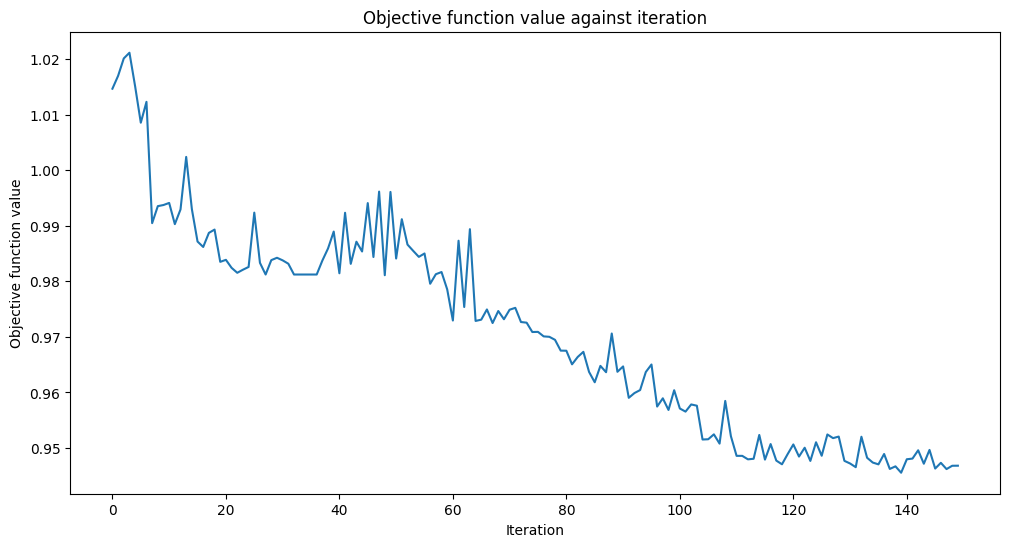

Training time: 162 seconds


In [85]:

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
train_labels = np.array(train_labels)
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [86]:
# Predict on train and validation sets
ytrain_pred = vqc.predict(X_train_res)
ytest_pred = vqc.predict(Xtest)
    
# Calculate F1 scores
train_f1 = f1_score(y_train_res, ytrain_pred)
val_f1 = f1_score(ytest, ytest_pred)

print(f"Classical SVC on the training dataset f1: {train_f1:.2f}")
print(f"Classical SVC on the test dataset f1:     {val_f1:.2f}")

Classical SVC on the training dataset f1: 0.59
Classical SVC on the test dataset f1:     0.51
